# STATISTICAL ANALYSIS PROJECT - 21/09/2019

PROJECT SUMMARY

1 - Analyse des variables

- Type (numérique / catégoriel)
- Regrouper entre elles les variables pouvant l'être ? (variables spaciales par ex)
- Commentaire sur l'importance a priori de la variable par rapport au prix (poser des hypothèses H0)

2 - Analyse de la variable cible du Prix

- Analyse de la distribution (histogramme)
- Calcul de valeurs types (moyenne / écart type / médiane / quartiles / skuness (niveau d'assymétrie))
- Visualisation de la corrélation des variables supposées importantes avec le prix
- Commenter

3 - Approche scientifique : Analyse globale

- Faire une Matrice de corrélation (de taille 80x80)
- Trier les scores de corrélation
- Visualiser une sous partie de la matrice avec le TOP 10 des variables les plus corrélées avec le prix
- Valider ou invalider les hypothèses H0
- Analyse approfondie entre ces variables et le prix (régression linéaire, visualisation scatter plot)

4 - Data Cleaning

- Remove missing values (justifier avec un commentaire)
- Remove outliers (justifier avec un commentaire)
- Transformer les données catégorielles en numériques (get dummies)
- Standardisation

5 - Data Visualization

- PCA


# Partie 1 - Analyse des variables

In [ ]:
# Loading the required librairies

In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp

In [102]:
# Loading the dataset

In [103]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
# 1 - Explore data and understand what the fields mean

In [105]:
# Checking the dataset shape
df.shape

(1460, 81)

In [106]:
# Checking the types of data
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [107]:
# Checking numerical variables

numeric = df.select_dtypes(include=['float64', 'int64']).head()
numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [108]:
numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [109]:
# Checking categorical variables

categorical = df.select_dtypes(include=['object']).head()
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [110]:
categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [111]:
# Checking the names of all columns

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [112]:
# Checking the names of all numeric columns

numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [113]:
# Checking the NaN values

df.isnull().values.any()

True

In [114]:
nuls = pd.isnull(df).sum()
nuls

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [115]:
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [116]:
list_of_nuls = []

for nul in nuls:
    if nul > 0:
        list_of_nuls.append(nul)

print(list_of_nuls)

[259, 1369, 8, 8, 37, 37, 38, 37, 38, 1, 690, 81, 81, 81, 81, 81, 1453, 1179, 1406]


In [117]:
# Removing columns with NaN values > 500 because the data is way too incomplete to properly analyse this column.

df.dropna(thresh=500, axis='columns').head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [118]:
# Checking data stats for the Price column

estate_price = df['SalePrice']
estate_price.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [119]:
# Checking value counts of different columns

df.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [120]:
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [121]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [122]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [ ]:
# Quelles sont les hypothèses a priori sur le dataset concernant la variable du prix de vente ?
# Nous allons nous focaliser sur 10 critères dans ce dataset.

"""
Hypothèses sur le dataset par rapport à la variable du prix

- H1 : La qualité générale du logement a un impact sur le prix (OverallQual)
- H2 : La condition générale du logement a un impact sur le prix (OverallCond)
- H3 : La présence d'une piscine a un impact sur le prix (PoolArea)
- H4 : La présence d'une cheminée a un impact sur le prix (Fireplaces)
- H5 : L'année de construction a un impact sur le prix (YearBuilt)
- H6 : Le "Ground Living Area" a un impact sur le prix (mètres carrés habitables) (GrLivArea)
- H7 : Le nombre de chambres a un impact sur le prix (BedroomAbvGr)
- H8 : Le nombre de places dans le garage a un impact sur le prix (GarageCars)
- H9 : L'air conditionné a un impact sur le prix (CentralAir)
- H10 : Le type de building a un impact sur le prix (BldgType)

"""

# Partie 2 - Analyse de la variable Prix

In [ ]:
# Analyse de la distribution (histogramme)

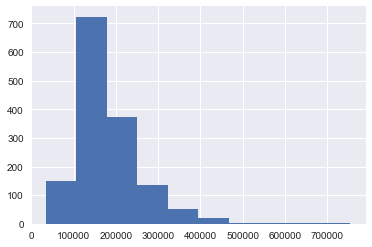

In [124]:
df['SalePrice'].hist(bins=10)

In [134]:
# Calcul de valeurs types (moyenne / écart type / médiane / quartiles / skuness (niveau d'assymétrie))

df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
# Visualisation de la corrélation des variables supposées importantes avec le prix

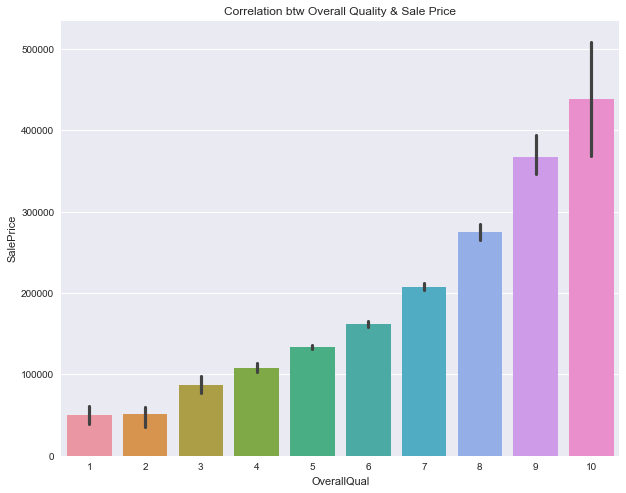

In [130]:
# H1 : La qualité générale du logement a un impact sur le prix (OverallQual)

ax = sns.barplot(x = "OverallQual", y = "SalePrice", data = df).set_title('Correlation btw Overall Quality & Sale Price')
sns.set(rc={'figure.figsize':(10,10)})

In [126]:
# It is obvious on this chart that the quality of the estate is inscreasing with the Sale Price.

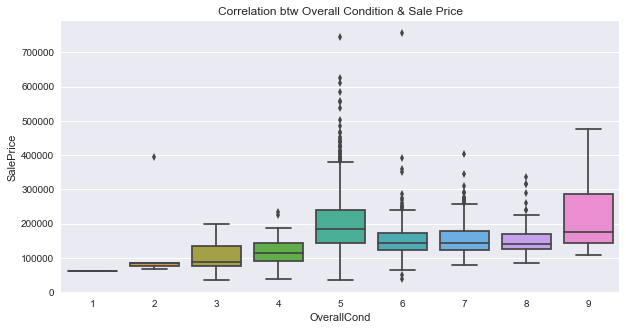

In [143]:
# H2 : La condition générale du logement a un impact sur le prix (OverallCond)

ax = sns.boxplot(x = "OverallCond", y = "SalePrice", data = df).set_title('Correlation btw Overall Condition & Sale Price')
sns.set(rc={'figure.figsize':(10,5)})

In [128]:
# The correlation between the Overall Condition & the Sale Price is less obvious here, 
# as we can see thanks to the boxplot chart.

# Indeed, a lot of estate goods around $200,000 seem to have an average Overall Condition close to 5/10.
# A lot of estate goods around $150,000 seem however to have an average Overall Condition close to 8/10.


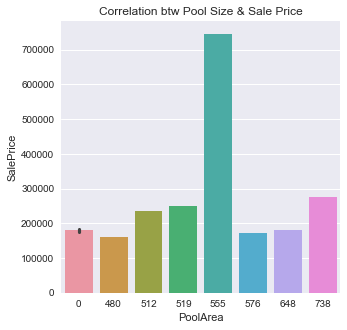

In [139]:
# H3 : La présence d'une grande piscine a un impact sur le prix (PoolArea)

ax = sns.barplot(x = "PoolArea", y = "SalePrice", data = df).set_title('Correlation btw Pool Size & Sale Price')

In [ ]:
# La taille de la piscine ne semble pas forcément corrélée au prix de vente.

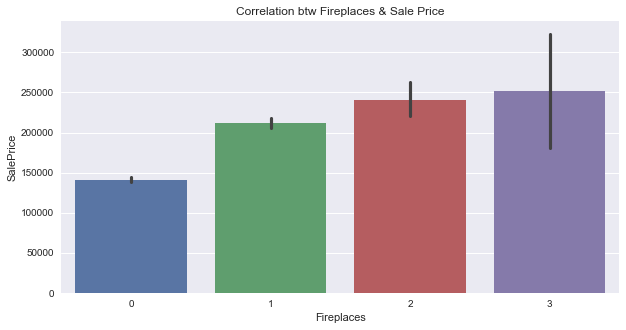

In [145]:
# H4 : La présence d'une ou de plusieurs cheminées a un impact sur le prix (Fireplaces)

ax = sns.barplot(x = "Fireplaces", y = "SalePrice", data = df).set_title('Correlation btw Fireplaces & Sale Price')

In [ ]:
# Oui : le prix du logement semble augmenter proportionnellement au nombre de cheminées.

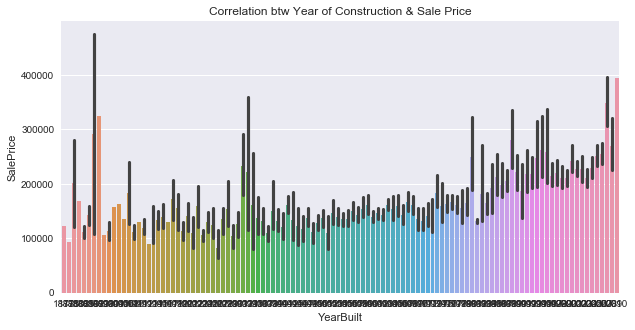

In [146]:
# H5 : L'année de construction a un impact sur le prix (YearBuilt)

ax = sns.barplot(x = "YearBuilt", y = "SalePrice", data = df).set_title('Correlation btw Year of Construction & Sale Price')

In [ ]:
# Plus le logement est récent, plus son prix moyen est important (le neuf coûte plus cher que l'ancien).
# Cela dit, il y a quelques exceptions notables dans le dataset.

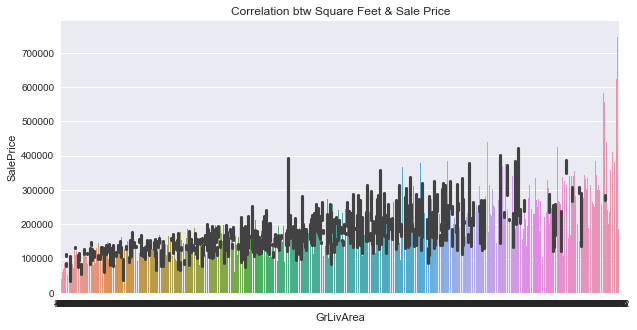

In [147]:
# H6 : Le "Ground Living Area" a un impact sur le prix (mètres carrés habitables) (GrLivArea)

ax = sns.barplot(x = "GrLivArea", y = "SalePrice", data = df).set_title('Correlation btw Square Feet & Sale Price')

In [ ]:
# Plus le logement est grand, plus son prix moyen est important.
# Cela dit, il y a quelques exceptions notables dans le dataset.

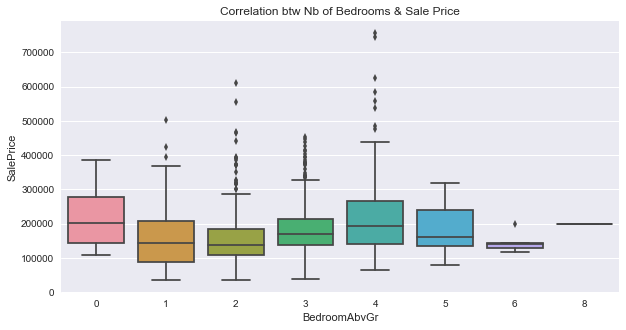

In [149]:
# H7 : Le nombre de chambres a un impact sur le prix (BedroomAbvGr)

ax = sns.boxplot(x = "BedroomAbvGr", y = "SalePrice", data = df).set_title('Correlation btw Nb of Bedrooms & Sale Price')

In [ ]:
# Il n'y a pas de corrélation directe entre le nombre de chambres et le prix.
# Par ex, le prix de vente est en moyenne plus élevé lorsqu'il y a 4 chambres que 6.

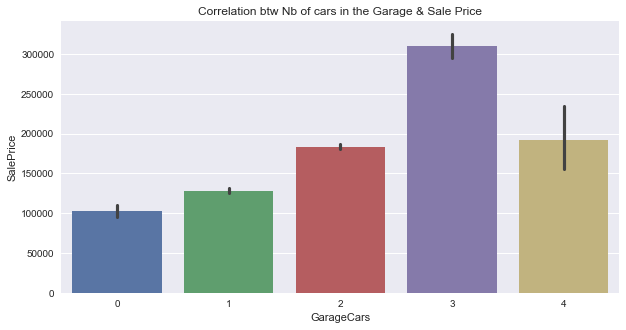

In [150]:
# H8 : Le nombre de places dans le garage a un impact sur le prix (GarageCars)

ax = sns.barplot(x = "GarageCars", y = "SalePrice", data = df).set_title('Correlation btw Nb of cars in the Garage & Sale Price')

In [ ]:
# Il y a une corrélation entre le prix et le nombre de voitures pouvant être garées dans le garage jusqu'au nombre de 3 voitures.
# Ensuite, le prix semble décroître.

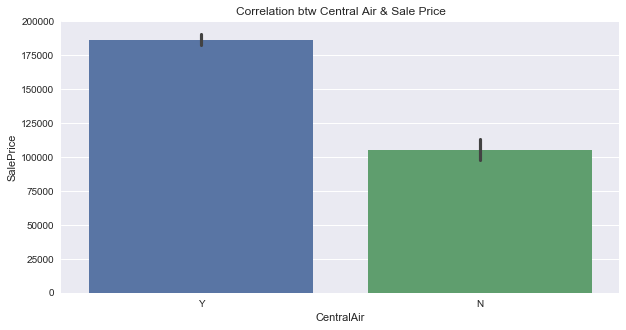

In [152]:
# H9 : L'air conditionné a un impact sur le prix (CentralAir)

ax = sns.barplot(x = "CentralAir", y = "SalePrice", data = df).set_title('Correlation btw Central Air & Sale Price')

In [ ]:
# Il y a une grande corrélation entre le prix et la présence ou non d'air conditionné dans le logement.

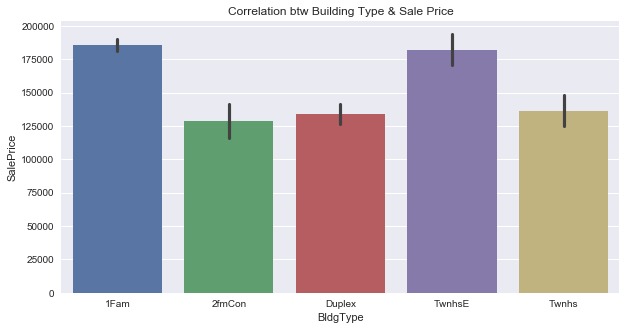

In [153]:
# H10 : Le type de building a un impact sur le prix (BldgType)

ax = sns.barplot(x = "BldgType", y = "SalePrice", data = df).set_title('Correlation btw Building Type & Sale Price')

In [154]:
# Les logements pouvant contenir 2 familles, les duplex et les maisons doubles sont moins chers 
# que les autres types de logements.

# Partie 3 - Approche scientifique : Analyse globale

In [165]:
# Faire une Matrice de corrélation avec les valeurs analysées

matrix = df[['SalePrice', 'OverallQual', 'OverallCond', 'PoolArea', 'Fireplaces', 'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'GarageCars', 'CentralAir', 'BldgType']]

corr = matrix.corr()

In [166]:
# Trier les scores de corrélation

corr.sort_values(by=['SalePrice'], ascending=False)

,SalePrice,OverallQual,OverallCond,PoolArea,Fireplaces,YearBuilt,GrLivArea,BedroomAbvGr,GarageCars
SalePrice,1.000000,0.790982,-0.077856,0.092404,0.466929,0.522897,0.708624,0.168213,0.640409
OverallQual,0.790982,1.000000,-0.091932,0.065166,0.396765,0.572323,0.593007,0.101676,0.600671
GrLivArea,0.708624,0.593007,-0.079686,0.170205,0.461679,0.199010,1.000000,0.521270,0.467247
GarageCars,0.640409,0.600671,-0.185758,0.020934,0.300789,0.537850,0.467247,0.086106,1.000000
YearBuilt,0.522897,0.572323,-0.375983,0.004950,0.147716,1.000000,0.199010,-0.070651,0.537850
Fireplaces,0.466929,0.396765,-0.023820,0.095074,1.000000,0.147716,0.461679,0.107570,0.300789
BedroomAbvGr,0.168213,0.101676,0.012980,0.070703,0.107570,-0.070651,0.521270,1.000000,0.086106
PoolArea,0.092404,0.065166,-0.001985,1.000000,0.095074,0.004950,0.170205,0.070703,0.020934
OverallCond,-0.077856,-0.091932,1.000000,-0.001985,-0.023820,-0.375983,-0.079686,0.012980,-0.185758


Text(0.5,1,'Correlation Matrix')

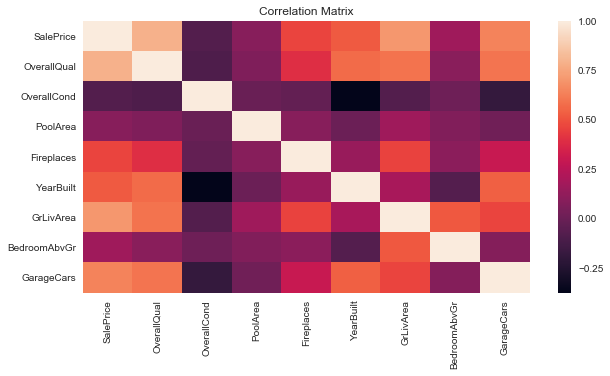

In [169]:
# Visualiser une sous-partie de la matrice avec le TOP 10 des variables les plus corrélées avec le prix

sns.heatmap(matrix.corr())
plt.title('Correlation Matrix')

In [ ]:
# Valider ou invalider les hypothèses H0

In [ ]:
# Analyse approfondie entre ces variables et le prix (régression linéaire, visualisation scatter plot)

# Partie 4 - Data Cleaning

In [ ]:
# Remove missing values (justifier avec un commentaire)

In [ ]:
# Remove outliers (justifier avec un commentaire)

In [ ]:
# Transformer les données catégorielles en données numériques (get dummies)

In [ ]:
# Standardisation

# Partie 5 - Data Visualization

In [132]:
# PCA

In [ ]:
# Summary